### The infinite _unsquare_ potential
Author: Jorge Vera Moreno

## Introduction
The time-dependent Schrödinger equation (TDSE) describes the behaviour and evolution of non-relativistic quantum systems in space and time. In its most general form<sup>[1]</sup>:

$$\widehat{H}\Psi(\mathbf{r},t)=i\hbar \frac{\partial\Psi(\mathbf{r},t)}{\partial t} \hspace{35pt} (1)$$

where $\widehat{H}$ is the Hamiltonian operatior (dependent on the physical nature of the system) and $\Psi(\mathbf{r},t)$ is the wavefunction of the system (from which all physical information can be derived). Separation of variables can be used to solve Eqn. (1). This allows the formulation of two differential equations, one dependent only on time, and another dependent only in space, the time-independent Schrödinger equation<sup>[1]</sup>:

$$\widehat{H}\Psi(\mathbf{r})=E\Psi(\mathbf{r}) \hspace{35pt} (2)$$

Eqn. (2) is an eigenvalue equation, in which the eigenvalues to be determined are called eigenstates or energy levels, $E$. In one-dimensional space, eqn. (2) can be expressed as:

$$ -\frac{\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x) \hspace{35pt} (3)$$

where $V(x)$ is the position-dependent potential experienced by a particle with wavefunction $\psi(x)$. In this assignment, different potentials are implemented to explore how they affect the wavefunction of the particle.

## Solving eigenvalue equations numerically using Python
To solve eqn. (3) for different potentials, the process can be summed up as follows:

1. Turn the second order ODE into a vector of two first order ODEs.
2. Define the potentials of interest.
3. Implement the Runge-Kutta method to solve ODEs numerically.
4. Implement the Secant Method to find the eigenstates of the system.
5. Define a function to find a number of eigenstates.
6. Plot the solutions.

#### 1. Turning the second order ODE into a vector of two first order ODEs:
By defining a function $\phi(x)$, the original second order ODE can be expressed as an abstract vector whose components give the derivatives of $\psi(x)$ and $\phi(x)$:

$$\frac{d \psi}{dx } = \phi \hspace{35pt} (4)$$
$$\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x) \hspace{35pt} (5)$$

We can now import the modules we will need for the assignment, define some physical constants and proceed to implement eqns. (4) and (5):

In [1]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
import warnings
#This assignment will use calculations with very small numbers, and some Python functions will
#warn about the use of such numbers because they might be rounded to zero. Nevertheless, by
#proceeding with caution, the warnings can be disabled.
warnings.filterwarnings("ignore")
#Plot graphs in notebook cells
%matplotlib inline 

In [2]:
#Defining physical constants
me = 9.1094e-31 #Electon mass
hbar = 1.0546e-34 #Reduced Planck constant
qe = 1.6022e-19 #Electronic charge
a = 5e-11 #Half-width of the well (specified)
xstart = -a #Left-most point of the well
xend = a #Right-most point of the well
N = 1000 #Number of points for Runge-Kutta
h = (xend - xstart)/N #Size of Runge-Kutta steps
xpoints = np.arange(xstart, xend, h) #Array of x points
phi0 = 1.0 #initial phi value
r = np.array([0, phi0]) #vector of boundary conditions

In [3]:
def f(r,x,E,potential):
    '''Function that takes an array with first component psi (wavefunction according to the TISE),
    and second component phi (as defined) and returns an array whose components are the respectve
    derivatives of the inputs.
    Inputs: r (array): vector with given psi and phi
            x (float): position of the particle
            E (float): energy of the particle in a given state.
            potential (float): potential given by a function
    Returns:
              (array): vector with derivative of psi and phi'''
    psi = r[0] # First element of r represents the wavefunction of the particle
    phi = r[1] # second element of r represents the phi-function of the particle
    fpsi = phi # d(psi)/dx according to the TISE
    fphi = (2*me/(hbar)**2)*(potential(x)-E)*psi # d(phi)/dx according to the TISE 
    return np.array([fpsi,fphi]) # Return fpsi and fphi in array form

#### 2. Defining the potentials of interest.
For this assignment, all potentials will be undefined for $|x|>a$, where $a=5\times 10^{-11} \mathsf{m}$.

##### 1. Infinite square well
$$V(x)=0,\quad |x|\leqslant a \hspace{35pt} (6)$$

##### 2. Harmonic potential
$$V(x) = V_0 \frac{x^2}{a^2},\quad |x|\leqslant a \hspace{35pt} (7)$$
where $V_0$ is an arbitrary constant, taken as $800\mathsf{eV} \approx 1.282\times 10^{-16}\mathsf{J}$

##### 3. Finite square well
$$
V(x) = \begin{cases} 0 & \text{if }  |x| \leqslant \frac{a}{2}, \\ 
    V_0  & \text{if } \frac{a}{2} <|x| \leqslant a, \end{cases} \hspace{35pt} (8)
$$

##### 4. Potential step
$$ V(x) = \begin{cases} V_1 & \text{if }  0 \leqslant x \leqslant a, \\ 
    0  & \text{if } -a \leqslant |x| < 0, \end{cases} \hspace{35pt} (9) $$
where $V_1$ is an arbitrary constant, taken as $2200\mathsf{eV} \approx 3.525\times 10^{-16}\mathsf{J}$.

The potentials can be defined as Python functions that take the position as float, and return the position as float:

In [4]:
def InfiniteWell(x):
    '''Function that returns the potential experienced by a free particle, given its position.
    Inputs: x (float): position of the particle
    Returns:  (float): potential experienced'''
    return 0.0

In [5]:
def QHO(x):
    '''Function that returns the potential experienced by a particle undergoing harmonic motion,
    given its position.
    Inputs: x (float): position of the particle
    Returns:  (float): potential experienced'''
    return 800*qe*(x/a)**2

In [6]:
def FSW(x):
    '''Function that returns the potential experienced by a particle in a finite square well,
    given its position.
    Inputs: x (float): position of the particle
    Returns:  (float): potential experienced'''
    if abs(x)<(a/2):
        return 0
    else:
        return qe*800

In [7]:
def Step(x):
    '''Function that returns the step potential experienced by a particle in the region x>0.
    Inputs: x (float): position of the particle
    Returns:  (float): potential experienced'''
    if x>0:
        return qe*2200
    else:
        return 0

#### 3. Implementing the Runge-Kutta method to solve ODEs numerically.
The fourth-order Runge-Kutta equations<sup>[2]</sup> give a method to numerically solve the TISE for a given potential and energy. They can be implemented in Python as a function that takes a $(\psi,\phi)$ vector, an array of positions, and the given energy and potential. These inputs are then used in the Runge-Kutta equations for the function $f$ defined above, and a step $h$ defined in the beginning. The output is an array of solutions of $\psi$ and $\phi$:

In [8]:
def RK(r,xpoints,E,potential):
    '''Fourth-order Runge-Kutta for two simultaneous equations
    Inputs: r: 2-component array , first component is psi, second phi
            xpoints: array of position values.
            E: energy of the particle in a given state
            potential (float): potential given by a function
    Outputs: [psipoints, phipoints]: solutions for psi(x) and phi(x), numpy arrays one longer than xpoints'''
    psipoints = [] # Initialise empty arrays
    phipoints = []
    for x in xpoints: # Loops over all xpoints up to (xend-h)
        psipoints.append(r[0])
        phipoints.append(r[1])
        # Runge-Kutta equations
        k1 = h*f(r,x,E,potential)
        k2 = h*f(r+0.5*k1, x+0.5*h, E,potential)
        k3 = h*f(r+0.5*k2, x+0.5*h, E,potential)
        k4 = h*f(r+k3, x+h, E,potential)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    # Append the initial psi and phi point to the solution
    psipoints.append(r[0])
    phipoints.append(r[1])
    return np.array([psipoints, phipoints]) # Convert output to numpy array with 2 rows and N+1 columns

#### 4. Implementing the Secant Method to find the eigenstates of the system.
We have implemented a function that can solve the TISE for a given energy. However, we need a method to determine the energy eigenvalues. For all potentials considered here, the boundary conditions are $\psi(-a)=0$ and $\psi(a)=0$, since there is no wavefunction beyond $-a$ or $a$. The first boundary condition can be implemented directly by setting the first value of $\psi$ to be 0. The second boundary condition will be used to determine the eigenstates of the systems. Since $a$ is a root of $\psi$, we can use the Secant Method to find the value of $E$ that satisfies this boundary condition. We can implement this by defining a function that takes a guess for the energy of the system and the potential, uses the first boundary condition and performs the Secant Method recursively to get the eigenstate to an arbitrary precision. However, it should be noted that the Secant Method does not necessarily converge and it can thus output energy values that when plugged into the TISE don't meet the boundary conditions<sup>[2]</sup>:

In [9]:
def eigen(E2,potential):
    '''Function that a guess of the energy of a particle in a given state, and returns the closest
    energy eigenvalue found using the secant method if the boundary conditions are satisfied,
    and 0 otherwise.
    Inputs:  E2 (float): guess of the enery of a particle.
             potential (float): potential given by a function
    Returns: E3 (float): closest energy eigenvalue to E2 found'''
    E1 = 0.0 #A guess of E=0 is declared
    phi0 = 1.0 #Initial phi is taken as 1
    r = np.array([0, phi0]) #Define vector with initial psi (0 by boundary conditions) and phi
    soln1 = RK(r,xpoints,E1,potential) #Find solution of the TISE with Runge-Kutta using the guess E=0
    #Take the final value of the array of solutions of psi. This is the value of psi
    #at the final point, the boundary condition to be met.
    psi1=soln1[0,N]
    soln2 = RK(r,xpoints,E2,potential) #Find another solution with the guess given as input.
    psi2=soln2[0,N]
    tolerance = 1e-21  #Define a tolerance
    err = 1  #Initialise the error variable
    #Find a value of energy for which both guesses give a value of psi as close to 0 as the
    #tolerance given (boundary condition), using the secant method.
    while err > tolerance:
        E3 = E2 - psi2*(E2-E1)/(psi2-psi1) #Secant method. E3 is the root of psi to be determined.
        err = abs(E2-E1) #The error is the difference in energy guesses
        #Reset energy values for the next iteration
        E1 = E2 
        E2 = E3 
        #Reset psi guesses at the boundary
        psi1 = RK(r,xpoints,E1,potential)[0,N]
        psi2 = RK(r,xpoints,E2,potential)[0,N]
    #Once a solution has been found using the secant method, return it if the guesses of psi
    #are indeed close to zero. This check is necessary because the secant method 
    #will sometimes find solutions that do not enforce the boundary condition that
    #psi at the last point is zero, because the solution found does not converge at this point.
    #If is the case, return 0.
    lim = 1e-9 #Tolerance of how close to zero psi at the boundary must be.
    if (abs(psi1)<lim) and (abs(psi2)<lim):
        return E3 #Return satisfactory energy guess.
    else:
        return 0 #Return 0 if convergence at last point failed.

##### 5. Defining a function to find a number of eigenstates.
We have implemented a function that can find the closest energy eigenvalue for a given guess. We can now define a function that generates guesses and obtains a number of eigenstates automatically. This function will take as arguments the number of eigenstates required, the potential, an initial energy guess, and a step between energy guesses. The function will iterate eigenstates and store unique eigenvalues that are finally returned:

In [10]:
def searcher(n,step,initial,potential):
    '''Function that looks for energy eigenvalues.
    Inputs:  n (int): number of desired eigenvalues.
             step (float): step to add to initial energy guess in each iteration 
             initial (float): initial energy guess
             potential (float): potential given by a function
    Returns: ev (array): array of energy eigenvalues found.'''
    ev=[] #Initialise empty list of eigenvalues
    #Initialise a counter and var1. Set the latter to the initial guess.
    counter=0
    var1=initial
    #Until the specified number (plus 3) of eigenvalues has been found, increase var1 by the step, 
    #find the closest energy eigenvalue using the eigen() function, and append it to the eigenvalue list
    #every time a new eigenvalue is found. 3 more eigenvalues than specified are calculated because
    #when eigenvalues are close in energy, the secant method will sometimes return a different eigenvalue
    #than the closest to the energy chosen. In order to get the energy levels in order, an extra 3 are
    #calculated to account for this, the list is then sorted, and the last two are dropped.
    while np.size(ev)<(n+3):
        var1+=step #Increase var1 by the step
        #Find closest energy eigenvalue to var1
        s1=eigen(var1,potential)
        #If the eigenvalue list is empty and the eigenvalue returned is valid, append it to the list.
        if np.size(ev)==0 and s1!=0:
            ev.append(s1)
        #If this is not the first eigenvalue, check if the previous distinct eigenvalue found
        #is very close to it (absolute tolerance of 1e-17). If they are that close, they are considered
        #to be equal in practice and not appended to the list. However, if they are distinct (and valid),
        #append this new energy value to the eigenvalue list. This ensures that only distinct energy
        #levels are found in 'ev' (no repeated values).
        if np.size(ev)!=0 and (not (np.isclose(s1,ev[counter],atol=1e-17))) and s1!=0:
            ev.append(s1)
            counter+=1
    ev.sort() #Sort the list of eigenvalues from lowest to highest levels.
    return(np.asarray(ev[:-2])) #Return the eigenvalue list after dropping the last 2 elements.

##### 6. Plotting the solutions
We can define one last function. It will find the solutions of the TISE for eigenstates found automatically. It then normalises the wavefunction by using the following identity<sup>[1]</sup>:
$$
\int_{-a}^{a} | \psi(x) |^2 {\rm d} x = 1 \hspace{35pt} (10)
$$

Since we don't have an analytical expression of $\psi(x)$, the integral will be evaluated numerically using the Trapezoid Method<sup>[2]</sup>:

$$
I(a) = h \left[ \frac{1}{2}\psi^2(-a) + \frac{1}{2}\psi^2(a) +
      \sum_{k=1}^{n-1}\psi^2(a + kh) \right] \hspace{35pt} (11)
$$

Using boundary conditions, eqn. (11) can be simplified further:

$$
I(a) = h\sum_{k=1}^{n-1}\psi^2(a + kh)\hspace{35pt} (12)
$$

Note that the function `np.arange` that was used to define `xpoints` gives the points of the array in the same form as the argument of $\psi$ in eqn. (12). Hence, the integral in eqn. (10) is given by the sum of the solution array squared times the step $h$. The wavefunction normalisation constant is then the value of the integral to the power of $-1/2$, so that eqn. (10) holds.

Once a normalised wavefunction has been calculated, the same function will plot it. The inputs of the function are then the number of eigenstates to look for, the potential, the title of the plot, the initial energy guess and the step between energy guesses:

In [11]:
def plotter(eigenstates,potential,mytitle,step,initial):
    '''Function that plots the wavefunction of a particle in the chosen number of eigenstates,
    with choice for title, initial energy guess and step between energy guesses.
    Inputs:  eigenstates (int): number of desired eigenvalues.
             potential (float): potential given by a function
             mytitle (string): title of the plot
             step (float): step to add to initial energy guess in each iteration 
             initial (float): initial energy guess
    Returns: plt.plot: plot of wavefunctions.'''
    #Search for eigenvalues with the specified conditions
    eigenvalues = searcher(eigenstates,step,initial,potential)
    #Iterate i (eigenvalues) and j (the number of the corresponding eigenvalue)
    for i,j in zip(eigenvalues,range(eigenstates)):
        sol=RK(r,xpoints,i,potential) #Find the solution of the TISE of the j-th eigenvalue
        #Find the normalisation constant by finding the area under the solution. The constant is
        #given by the area to the power of -1/2
        normalisation = h*np.sum(sol[0]**2)
        #Multiply the solution by the normalisation constant
        normalsol=(1/np.sqrt(normalisation))*sol
        #Declare array of x-values with the same number of elements as the solution
        xplot=np.arange(xstart, xend+h, h)
        #Plot the wavefunction of the j-th eigenstate
        plt.plot(xplot,normalsol[0],label="State number %s" %(j+1))
        #Set x plot limits
        plt.xlim(-1.5*a,1.5*a)
        #Turn on legend and set location
        plt.legend()
        plt.legend(loc=(1.1,0.4))
        #Set plot labels and title
        plt.xlabel("Position $\quad x \mathbf{(m)}$")
        plt.ylabel(r'Wavefunction $\quad \psi (\mathsf{m^{-1/2})}$')
        plt.title(mytitle)
        #Set dashed lines at the boundaries
        plt.axvline(x=-a,c='k',ls='dashed',lw=2)
        plt.axvline(x=a,c='k',ls='dashed',lw=2)
        #Activate the grid
        plt.grid(True)

## Solutions

### 1. Infinite square well

The first 4 energy eigenvalues (in eV) are:

In [12]:
#Call searcher() to look for the first 4 eigenstates, with initial guess 1e-18 J, step
#between guesses 5e-18 J, the potential in question, and divide the result by the charge of 
#the electron to give the results in eV instead of J.
print((1/qe)*searcher(4,5e-18,1e-18,InfiniteWell)[:-1])

[  37.60441039  150.41764157  338.43969356  601.6705665 ]


This potential has analytical energy eigenvalues given by<sup>[1]</sup>:
$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2} \hspace{35pt} (13)
$$
We can generate the first 4 eigenstates using eqn. (13) and compare them to the numerical results:

In [13]:
#Generate eigenstates from eqn. (13) by list comprehension. Dividing by qe to get results in eV.
[((np.pi*hbar*n)**2)/(8*me*qe*a**2) for n in range(1,5)]

[37.60441039077787, 150.4176415631115, 338.4396935170008, 601.670566252446]

We can see that the analytical and numerical results agree. We can now plot our normalised eigenfunctions:

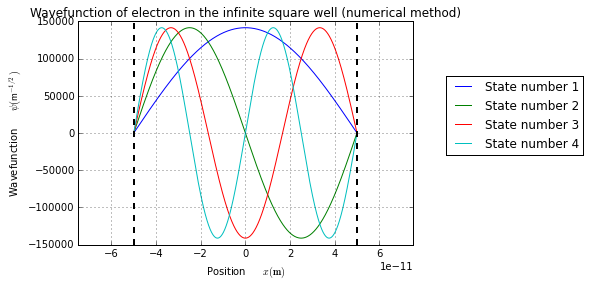

In [14]:
plotter(4,InfiniteWell,"Wavefunction of electron in the infinite square well (numerical method)",5e-18,1e-18)

The eigenfunctions of this system are also given by the analytical expressions<sup>[1]</sup>:
$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right), \qquad 
    n \ \mathrm{odd}\hspace{35pt} (14)
    $$
    $$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right), \qquad
    n \ \mathrm{even}\hspace{35pt} (15)
$$
We can implement, plot and compare them to our numerical eigenfunctions:

In [15]:
def analytical(x,n):
    cons = np.sqrt(1/a)
    if (n % 2) == 0: #n is even
        return cons*np.sin(n*np.pi*x/(2*a))
    else: #n is odd
        return cons*np.cos(n*np.pi*x/(2*a))

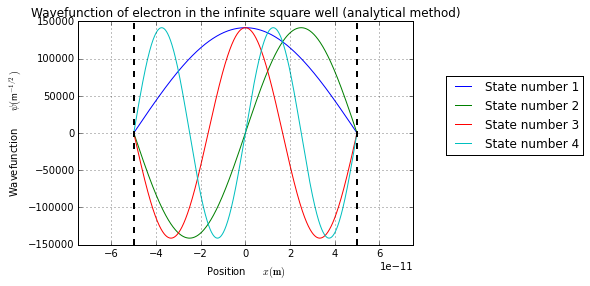

In [16]:
xplot=np.arange(xstart, xend+h, h)
for i in range(1,5):
    #Plot the wavefunction of the i-th eigenstate
    plt.plot(xplot,analytical(xplot,i),label="State number %s" %(i))
    #Set x plot limits
    plt.xlim(-1.5*a,1.5*a)
    #Turn on legend and set location
    plt.legend()
    plt.legend(loc=(1.1,0.4))
    #Set plot labels and title
    plt.xlabel("Position $\quad x \mathbf{(m)}$")
    plt.ylabel(r'Wavefunction $\quad \psi (\mathsf{m^{-1/2})}$')
    plt.title("Wavefunction of electron in the infinite square well (analytical method)")
    #Set dashed lines at the boundaries
    plt.axvline(x=-a,c='k',ls='dashed',lw=2)
    plt.axvline(x=a,c='k',ls='dashed',lw=2)
    #Activate the grid
    plt.grid(True)

We can see that the eigenfunctions are the same using both methods (some eigenstates are flipped due to normalisation, but it doesn't change $|\psi_n|^2$).

As the eigenvalue number increases, finding eigenvalues takes a longer time because the energy states get closer, meaning that a small variation in the guess will lead to different eigenstates, thus having to choose a very small step. No matter how small the step, eventually it will become too big, so this method is inefficient for many eigenvalues.  As an example, two very close energy guesses lead to vastly different eigenvalues:

In [17]:
print(eigen(1.1e-15,InfiniteWell)/qe,eigen(1e-15,InfiniteWell)/qe)

(72802.578503863784, 6355.1456505435881)


### 2. Harmonic potential


The first 4 energy eigenvalues (in eV) are:

In [18]:
print((1/qe)*searcher(4,20e-18,1e-18,QHO)[:-1])

[ 110.85961062  336.61085678  580.47767449  864.72836759]


This potential has analytical eigenvalues given by<sup>[1]</sup>:
$$E_n=(n+1/2)\hbar \omega \hspace{35pt} (16)$$
where $$\omega = \bigg(\frac{2V_0}{ma^2} \bigg)^{1/2} \hspace{35pt} (17)$$ 
This gives the following ideal energy eigenvalues (in eV):

In [19]:
omega=np.sqrt((2*800*qe)/(me*a**2))
print([(n+0.5)*hbar*omega/qe for n in range(4)])

[110.41917762368404, 331.25753287105215, 552.09588811842025, 772.93424336578835]


Although the energy values are very similar for small eigenstates, they quickly diverge. This is because the potential solved numerically isn't the ideal quantum harmonic oscillator, as we forced the wavefunction to be 0 at the boundaries, as shown here:

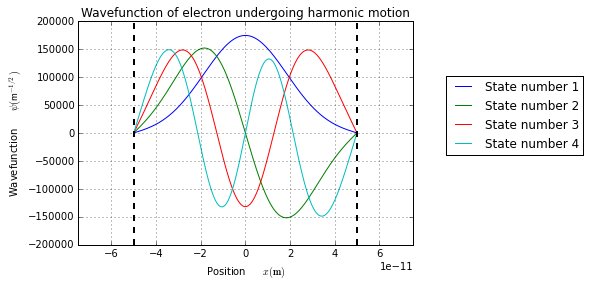

In [20]:
plotter(4,QHO,"Wavefunction of electron undergoing harmonic motion",20e-18,1e-18)

The solutions found here finish abruptly at the boundaries, but for a standard quantum harmonic oscillator, the wavefunctions approach $\psi=0$ as $x$ increases. This can be seen in the following image, where $\psi^2$ is shown instead: https://upload.wikimedia.org/wikipedia/commons/3/35/Aufenthaltswahrscheinlichkeit_harmonischer_Oszillator.png

### 3. Finite square well

The first 4 energy eigenvalues (in eV) are:

In [21]:
print((1/qe)*searcher(4,20e-18,1e-18,FSW)[:-1])

[   91.65799811   355.83842782   744.41813995  1117.55200881]


There is no analytical expression for the energy eigenvalues in this case<sup>[1]</sup>. Numerical approximations are easy to look up, but as in the harmonic potential case, the potential here is forced to end at the boundaries. In this case the difference is bigger because the probability of finding the electron beyond the well is larger in this case:

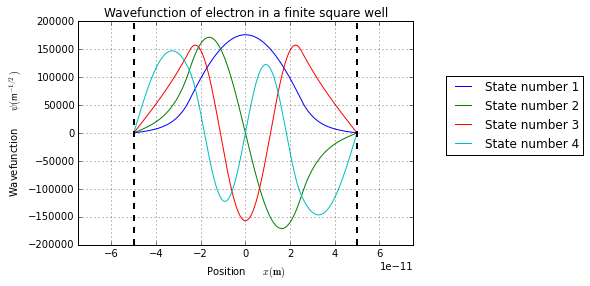

In [22]:
plotter(4,FSW,"Wavefunction of electron in a finite square well",20e-18,1e-18)

An example of finite square well solution is shown here: https://upload.wikimedia.org/wikipedia/commons/b/b0/Finite-well-solutions.gif . It can be seen how the area below $\psi^2$ and beyond the well is larger here than in the harmonic potential case. In the limit that $V_0 \rightarrow \infty$, the infinite square well is recovered.

#### 4. Step potential

The first 4 energy eigenvalues (in eV) are:

In [23]:
print((1/qe)*searcher(4,9e-18,1e-18,Step)[:-1])

[  127.91575665   509.05872854  1132.8470331   1956.74440187]


There is no analytical expression for the eigenvalues in this case either<sup>[1]</sup>, but we can again compare it to the standard step potential:

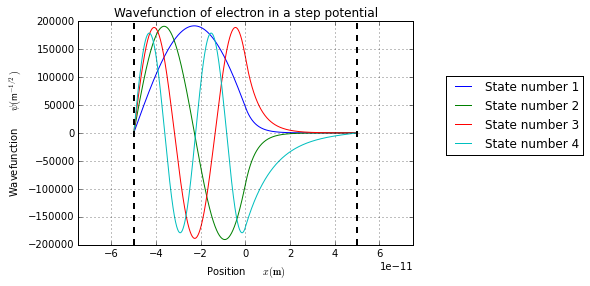

In [24]:
plotter(4,Step,"Wavefunction of electron in a step potential",9e-18,1e-18)

The numerical solutions are similar to the ideal solutions because the boundary condition at $a$ also holds in the ideal case. If the left-most boundary was moved further, the numerical solutions would be even more similar to the ones shown here: http://demonstrations.wolfram.com/ScatteringOverPotentialStep/HTMLImages/index.en/popup_2.jpg . It is interesting to see how the wavefunction changes from oscillating before the interface, to decaying after the interface, due to reflection and transmission at the boundary.<sup>[1]</sup>

### References
[1]: R. Eisberg and R. Resnick, _Quantum Physics of Atoms, Molecules, Solids, Nuclei and Particles_, First Ed. New York: Wiley, 1985.

[2]: M. Allen and E. Isaacson, _Numerical Analysics for Applied Science_, New York: Wiley, 1998.